# 5. Gender and Behaviour

In [2]:
from sys import dont_write_bytecode

import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
import utils as utils

In [3]:
df = pd.read_feather("./data/averaged.feather")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 5089
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Gender_Student                                3875 non-null   category
 1   Lang_Spoken_Home                              3875 non-null   category
 2   Books_Home                                    3875 non-null   category
 3   Own_Computer                                  3875 non-null   category
 4   Shared_Computer                               3875 non-null   category
 5   Smartphone                                    3875 non-null   category
 6   Internet_Access                               3875 non-null   category
 7   Study_Desk                                    3875 non-null   category
 8   Own_Room                                      3875 non-null   category
 9   ParentA_Edu_Level                             3875 non-nu

# 5.1 Disorderly Behaviour and Gender

In [4]:
disorderly_mask = df.columns.str.contains("Disorderly")
df[df.columns[disorderly_mask]].value_counts()

Disorderly_Behavior_during_Math_Lessons  Disorderly_Behavior_during_Science_Lessons
Some Lessons                             Some Lessons                                  2059
Few Lessons                              Few Lessons                                   1441
Most Lessons                             Most Lessons                                   375
Name: count, dtype: int64

In [5]:
df["Disorderly_Behavior_during_Math_Lessons"] = df["Disorderly_Behavior_during_Math_Lessons"].apply(lambda x: "Few Lessons" if "Few" in str(x) else x )
df["Disorderly_Behavior_during_Math_Lessons"] = df["Disorderly_Behavior_during_Math_Lessons"].apply(lambda x: "Most Lessons" if "Most" in str(x) else x )
df["Disorderly_Behavior_during_Math_Lessons"] = df["Disorderly_Behavior_during_Math_Lessons"].apply(lambda x: "Some Lessons" if "Some" in str(x) else x )
df["Disorderly_Behavior_during_Math_Lessons"].value_counts()

Disorderly_Behavior_during_Math_Lessons
Some Lessons    2059
Few Lessons     1441
Most Lessons     375
Name: count, dtype: int64

In [6]:
df["Disorderly_Behavior_during_Math_Lessons"]  = pd.Categorical(df["Disorderly_Behavior_during_Math_Lessons"] ,ordered=True, categories=["Few Lessons", "Some Lessons", "Most Lessons"])



In [7]:
df["Disorderly_Behavior_during_Science_Lessons"] = df["Disorderly_Behavior_during_Science_Lessons"].apply(lambda x: "Few Lessons" if "Few" in str(x) else x )
df["Disorderly_Behavior_during_Science_Lessons"] = df["Disorderly_Behavior_during_Science_Lessons"].apply(lambda x: "Most Lessons" if "Most" in str(x) else x )
df["Disorderly_Behavior_during_Science_Lessons"] = df["Disorderly_Behavior_during_Science_Lessons"].apply(lambda x: "Some Lessons" if "Some" in str(x) else x )
df["Disorderly_Behavior_during_Science_Lessons"].value_counts()

Disorderly_Behavior_during_Science_Lessons
Some Lessons    2059
Few Lessons     1441
Most Lessons     375
Name: count, dtype: int64

In [8]:
df["Disorderly_Behavior_during_Science_Lessons"]  = pd.Categorical(df["Disorderly_Behavior_during_Math_Lessons"] ,ordered=True, categories=["Few Lessons", "Some Lessons", "Most Lessons"])



### 5.1.1 Gender and Disorderly Behaviour in Math Classes

#### 5.1.1.1 Gender wise distribution of Pupils having frequent disorderly behaviour

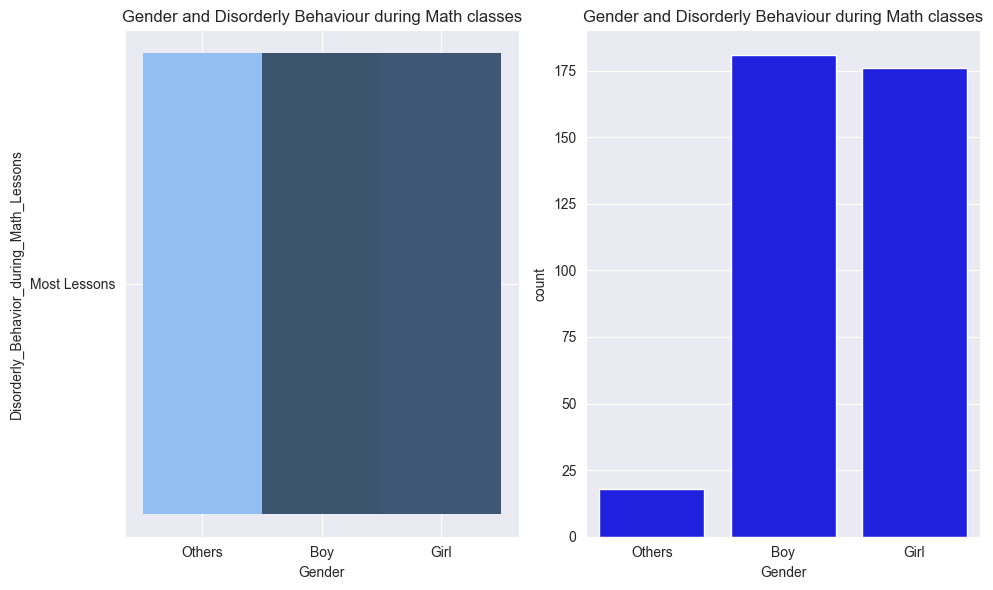

,count,unique,top,freq
Gender_Student,,,,
Others,18,1,Others,18
Boy,181,1,Boy,181
Girl,176,1,Girl,176


In [9]:
maths_filterd, math_grouped = utils.getDisorderlyBehaviourPerGender(df, "Math", "Most")
math_grouped.describe()

#### 5.1.1.2 Gender wise distribution of Pupils having some disorderly behaviour

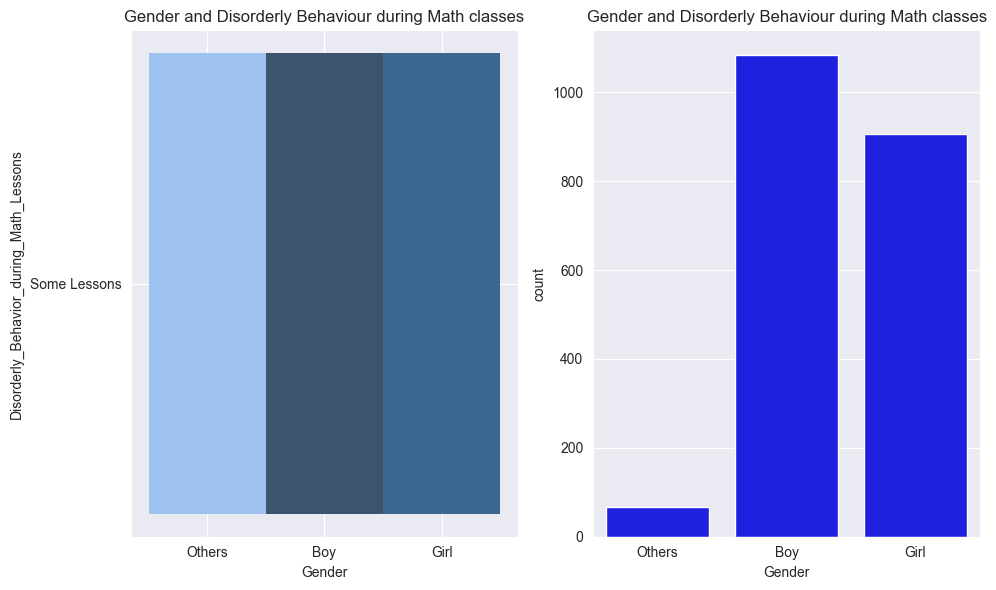

,count,unique,top,freq
Gender_Student,,,,
Others,67,1,Others,67
Boy,1085,1,Boy,1085
Girl,907,1,Girl,907


In [10]:
maths_filterd, math_grouped = utils.getDisorderlyBehaviourPerGender(df, "Math", "Some")
math_grouped.describe()

#### 5.1.1.3 Gender wise distribution of Pupils having few disorderly behaviour

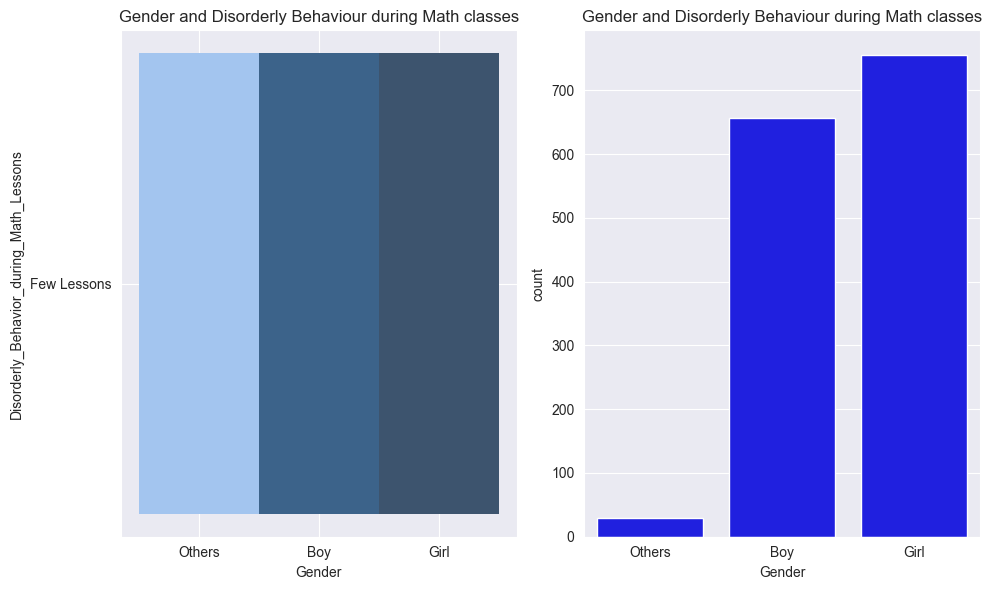

,count,unique,top,freq
Gender_Student,,,,
Others,29,1,Others,29
Boy,656,1,Boy,656
Girl,756,1,Girl,756


In [11]:
maths_filterd, math_grouped = utils.getDisorderlyBehaviourPerGender(df, "Math", "Few")
math_grouped.describe()

### 5.1.2 Gender and Disorderly Behaviour in Science Classes

#### 5.1.2.1 Gender wise distribution of Pupils having frequent disorderly behaviour

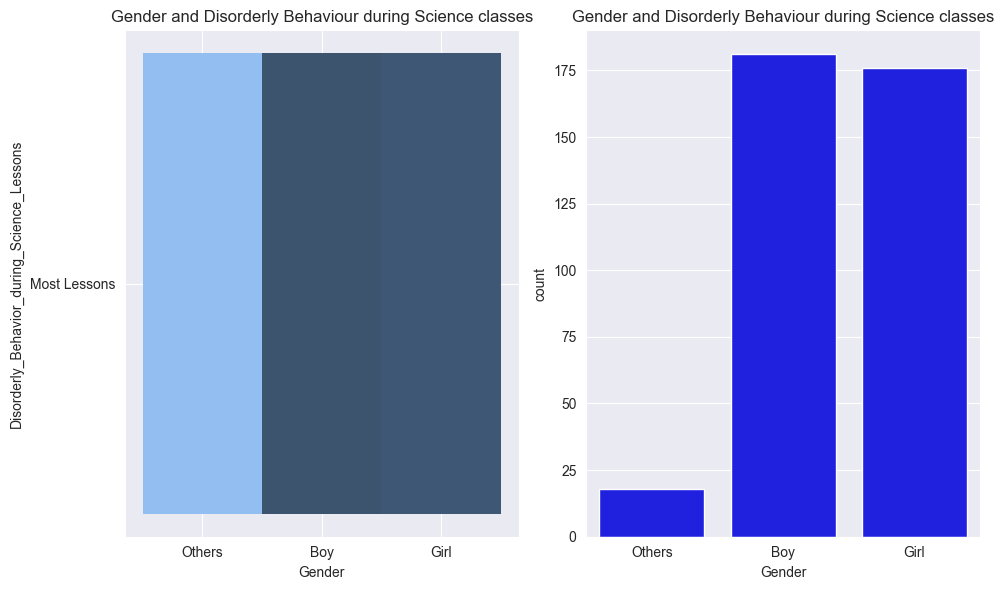

,count,unique,top,freq
Gender_Student,,,,
Others,18,1,Others,18
Boy,181,1,Boy,181
Girl,176,1,Girl,176


In [12]:
maths_filterd, math_grouped = utils.getDisorderlyBehaviourPerGender(df, "Science", "Most")
math_grouped.describe()

#### 5.1.2.2 Gender wise distribution of Pupils having some disorderly behaviour

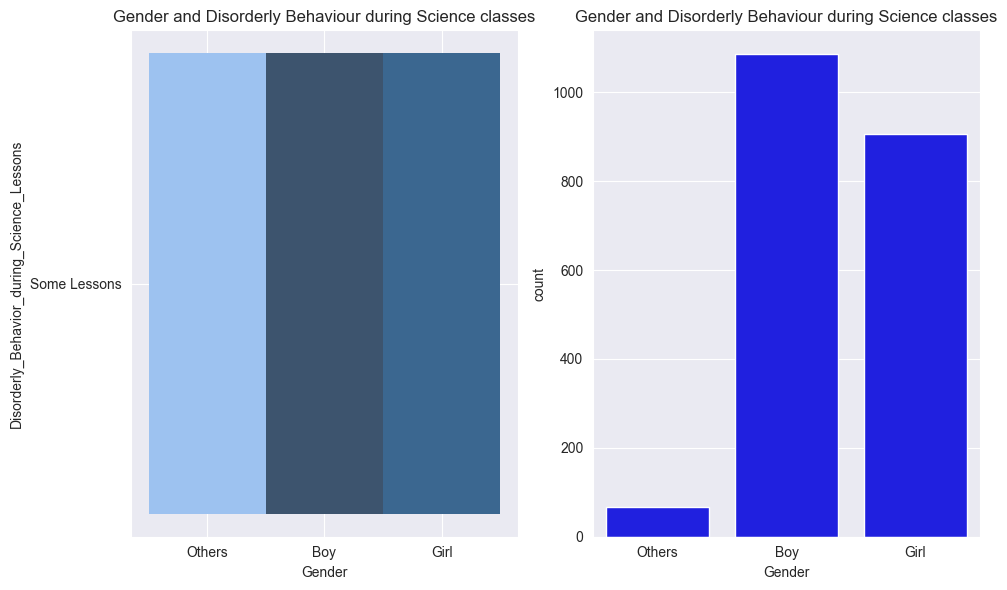

,count,unique,top,freq
Gender_Student,,,,
Others,67,1,Others,67
Boy,1085,1,Boy,1085
Girl,907,1,Girl,907


In [13]:
maths_filterd, math_grouped = utils.getDisorderlyBehaviourPerGender(df, "Science", "Some")
math_grouped.describe()


#### 5.1.2.3 Gender wise distribution of Pupils having few disorderly behaviour

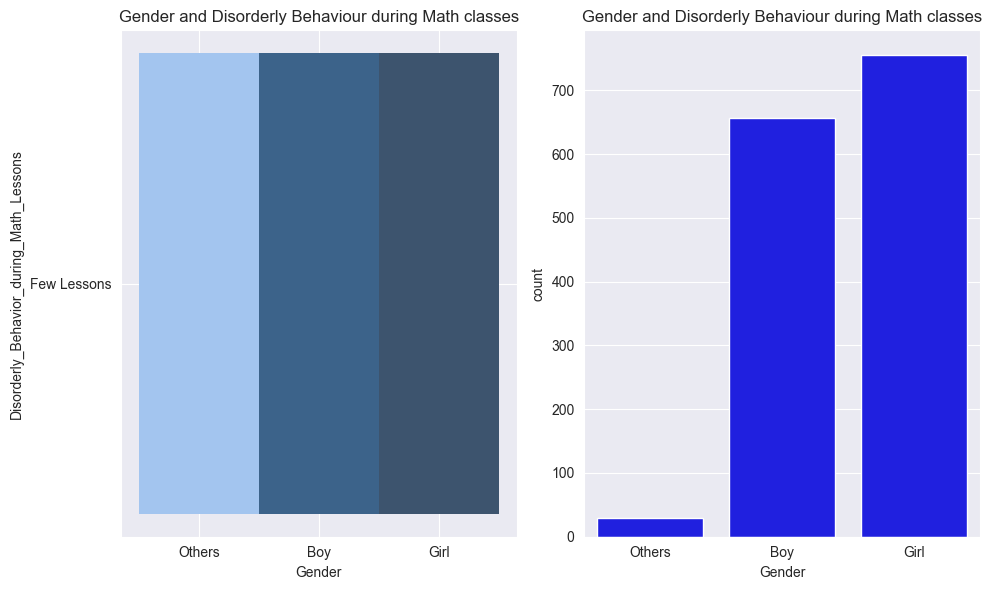

,count,unique,top,freq
Gender_Student,,,,
Others,29,1,Others,29
Boy,656,1,Boy,656
Girl,756,1,Girl,756


In [14]:
maths_filterd, math_grouped = utils.getDisorderlyBehaviourPerGender(df, "Math", "Few")
math_grouped.describe()

### 5.1.3 Gender and  Overall Disorderly Behaviour

In [15]:
science_most = df["Disorderly_Behavior_during_Science_Lessons"].str.contains("Most")
maths_most = df["Disorderly_Behavior_during_Math_Lessons"].str.contains("Most")
science_few = df["Disorderly_Behavior_during_Science_Lessons"].str.contains("Few")
maths_few = df["Disorderly_Behavior_during_Math_Lessons"].str.contains("Few")



#### 5.1.3.1 Gender wise distribution of students having frequent disorderly behavior across subjects

In [16]:
most_disorderly = df[science_most | maths_most]
most_disorderly.describe()


,1ST_PV_MATHEMATICS,2ND_PV_MATHEMATICS,3RD_PV_MATHEMATICS,4TH_PV_MATHEMATICS,5TH_PV_MATHEMATICS,1ST_PV_SCIENCE,2ND_PV_SCIENCE,3RD_PV_SCIENCE,4TH_PV_SCIENCE,5TH_PV_SCIENCE,...,2ND_PV_EARTH_SCIENCE,3RD_PV_EARTH_SCIENCE,4TH_PV_EARTH_SCIENCE,5TH_PV_EARTH_SCIENCE,AVERAGE_PV_SCIENCE,AVERAGE_PV_MATHEMATICS,AVERAGE_PV_BIOLOGY,AVERAGE_PV_CHEMISTRY,AVERAGE_PV_PHYSICS,AVERAGE_PV_EARTH_SCIENCE
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,504.957021,507.967439,507.430038,506.996353,507.643269,517.395550,519.363338,519.677339,521.794787,520.595490,...,522.570258,527.288851,524.217921,523.628670,519.765301,506.998824,519.214729,521.885680,511.457032,525.502349
std,72.076804,75.277862,73.323459,73.151227,75.047655,78.341466,82.896807,78.756068,82.635062,81.783305,...,82.414376,82.044059,82.434559,82.963126,77.146383,70.588357,82.494197,75.013464,81.504871,76.942052
min,321.690010,301.721470,323.701920,283.797580,285.025620,304.615810,262.684720,317.678650,298.899250,255.672900,...,235.014930,290.635780,210.880330,270.262330,303.699012,307.604440,308.626900,297.973606,282.453055,292.409028
25%,455.359065,460.015970,452.324495,458.439780,460.272860,460.427845,460.316145,467.059685,466.915120,474.173365,...,468.228840,475.336215,473.000775,469.248200,470.595295,458.082107,461.747890,470.247034,460.909382,480.328878
50%,510.570510,513.028050,512.592640,514.228300,509.982280,521.247920,522.164860,517.497900,523.824920,521.985970,...,528.833000,528.348630,526.261000,526.473480,524.729316,513.948918,517.475674,528.181114,515.585190,526.524528
75%,552.367395,560.164180,559.478110,556.733855,554.698950,567.452510,574.304715,576.266705,578.417630,580.651740,...,579.652880,580.879850,579.092665,572.122050,573.453676,555.179755,580.084199,571.597758,568.080555,581.454334
max,709.089030,740.147210,697.746350,704.066950,736.804680,741.083230,737.233290,756.094360,732.127710,724.134910,...,717.989830,742.065030,718.222080,737.258580,697.753074,687.338924,721.367310,712.031484,704.573155,700.483012


In [17]:
most_disorderly.groupby("Gender_Student", observed=False)["Gender_Student"].describe()

,count,unique,top,freq
Gender_Student,,,,
Others,18,1,Others,18
Boy,181,1,Boy,181
Girl,176,1,Girl,176


##### 5.1.3.1.1 Percentage of boys exhibiting frequent disorderly behaviour

In [18]:
perc_boys = most_disorderly[most_disorderly["Gender_Student"].str.contains("Boy")]["Gender_Student"].count() / df[df["Gender_Student"].str.contains("Boy")]["Gender_Student"].count()
perc_boys * 100

np.float64(9.417273673257023)

##### 5.1.3.1.2 Percentage of girls exhibiting frequent disorderly behaviour

In [19]:
perc_boys = most_disorderly[most_disorderly["Gender_Student"].str.contains("Girl")]["Gender_Student"].count() / df[df["Gender_Student"].str.contains("Girl")]["Gender_Student"].count()
perc_boys * 100

np.float64(9.57041870581838)

#### 5.1.3.2 Gender wise distribution of students having very few disorderly behavior across subjects

In [20]:
few_disorderly = df[science_few & maths_few]

In [21]:
few_disorderly.groupby("Gender_Student")["Gender_Student"].describe()

C:\Users\ssree\AppData\Local\Temp\ipykernel_7816\1123985767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  few_disorderly.groupby("Gender_Student")["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,29,1,Others,29
Boy,656,1,Boy,656
Girl,756,1,Girl,756



##### 5.1.3.2.1 Percentage of boys exhibiting fewer disorderly behaviour

In [22]:
perc_boys = few_disorderly[few_disorderly["Gender_Student"].str.contains("Boy")]["Gender_Student"].count() / df[df["Gender_Student"].str.contains("Boy")]["Gender_Student"].count()
perc_boys * 100

np.float64(34.13111342351717)


##### 5.1.3.2.2 Percentage of girls exhibiting fewer disorderly behaviour

In [23]:
perc_boys = few_disorderly[few_disorderly["Gender_Student"].str.contains("Girl")]["Gender_Student"].count() / df[df["Gender_Student"].str.contains("Girl")]["Gender_Student"].count()
perc_boys * 100

np.float64(41.109298531810765)

## 5.2 Subject Likeness and Gender

In [24]:
subject_likeness_mask = df.columns.str.contains("Like_Learning")
df[df.columns[subject_likeness_mask]].value_counts()

Students_Like_Learning_Mathematics  Students_Like_Learning_Science
Do not like                         Do not like                       945
                                    Some what like                    806
Some what like                      Some what like                    520
Do not like                         Very much like                    468
Some what like                      Very much like                    384
                                    Do not like                       334
Very much like                      Very much like                    195
                                    Some what like                    147
                                    Do not like                        76
Name: count, dtype: int64

In [25]:

df["Students_Like_Learning_Mathematics"] = df["Students_Like_Learning_Mathematics"].apply(lambda x: "Do not like" if "Do Not" in str(x) else x )
df["Students_Like_Learning_Mathematics"] = df["Students_Like_Learning_Mathematics"].apply(lambda x: "Some what like" if "Somewhat" in str(x) else x )
df["Students_Like_Learning_Mathematics"] = df["Students_Like_Learning_Mathematics"].apply(lambda x: "Very much like" if "Very Much" in str(x) else x )
df["Students_Like_Learning_Mathematics"].value_counts()



Students_Like_Learning_Mathematics
Do not like       2219
Some what like    1238
Very much like     418
Name: count, dtype: int64

In [26]:
df["Students_Like_Learning_Science"] = df["Students_Like_Learning_Science"].apply(lambda x: "Do not like" if "Do Not" in str(x) else x )
df["Students_Like_Learning_Science"] = df["Students_Like_Learning_Science"].apply(lambda x: "Some what like" if "Somewhat" in str(x) else x )
df["Students_Like_Learning_Science"] = df["Students_Like_Learning_Science"].apply(lambda x: "Very much like" if "Very Much" in str(x) else x )
df["Students_Like_Learning_Science"].value_counts()



Students_Like_Learning_Science
Some what like    1473
Do not like       1355
Very much like    1047
Name: count, dtype: int64

### 5.2.1 Gender and Likeness for Mathematics

#### 5.2.1.1 Gender wise distribution of students who like Mathematics

In [27]:
ver_much_like = df["Students_Like_Learning_Mathematics"].str.contains("Very")
some_what_like = df["Students_Like_Learning_Mathematics"].str.contains("Some")
like_maths  = df[ver_much_like | some_what_like]
like_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,46,1,Others,46
Boy,887,1,Boy,887
Girl,723,1,Girl,723


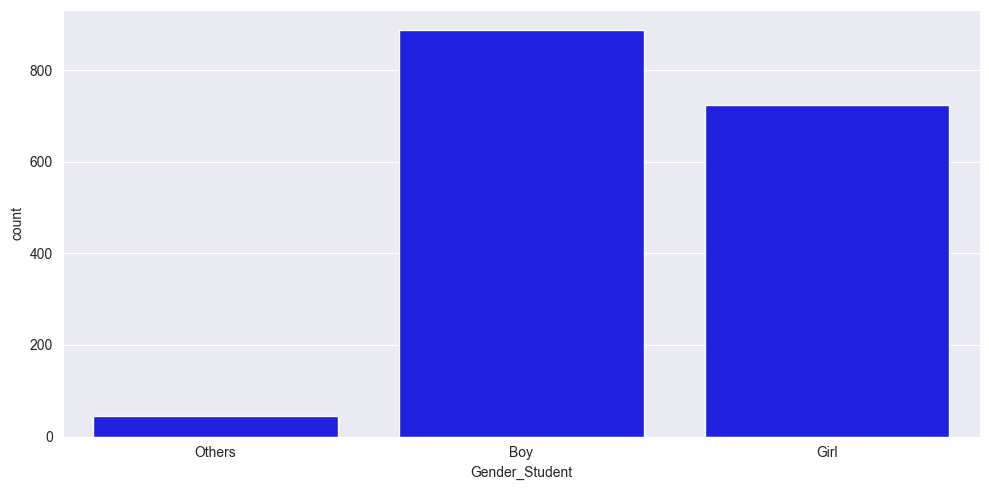

In [28]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=like_maths, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()

##### 5.2.1.1.1 Percentage of boys, who like mathematics

In [29]:
utils.getPercentageByGender(like_maths,df,"Boy")

0.4614984391259105


##### 5.2.1.1.2 Percentage of girls, who like mathematics

In [30]:
utils.getPercentageByGender(like_maths,df,"Girl")

0.3931484502446982


#### 5.2.1.2 Gender wise distribution of students who do not like Mathematics

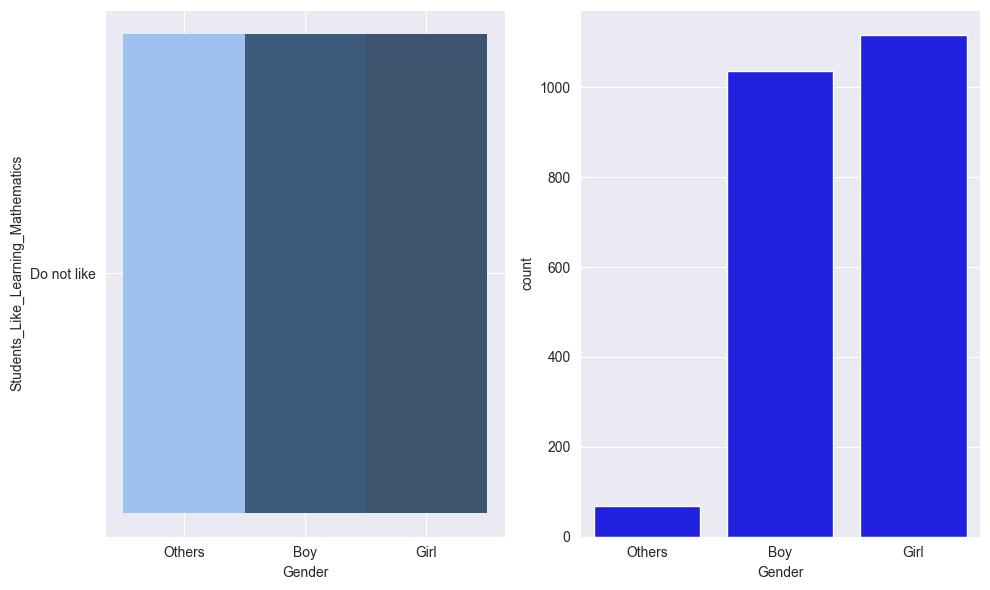

,Gender_Student,Lang_Spoken_Home,Books_Home,Own_Computer,Shared_Computer,Smartphone,Internet_Access,Study_Desk,Own_Room,ParentA_Edu_Level,...,Disorderly_Behavior_during_Science_Lessons,Students_Value_Environmental_Preservation,AVERAGE_PV_SCIENCE,AVERAGE_PV_MATHEMATICS,AVERAGE_PV_BIOLOGY,AVERAGE_PV_CHEMISTRY,AVERAGE_PV_PHYSICS,AVERAGE_PV_EARTH_SCIENCE,highest,Parental_Origin
0,Girl,Sometimes,One Book Case,Yes,Yes,Yes,Yes,Yes,Yes,Not Available,...,Some Lessons,Strongly value,646.737090,617.370980,621.484356,629.224984,604.773000,592.261964,Not Available,All Foreign
1,Girl,Sometimes,One Book Case,Yes,Yes,Yes,Yes,Yes,Yes,Not Available,...,Some Lessons,Strongly value,575.796714,526.669736,536.705586,620.597004,575.948448,596.971438,Not Available,All Foreign
2,Girl,Almost always,One Book Case,Yes,No,Yes,Yes,Yes,Yes,Not Available,...,Some Lessons,Strongly value,544.337234,496.228622,563.870548,529.335138,493.620340,497.036416,Not Available,All Foreign
4,Others,Almost always,One Book Case,Yes,Yes,Yes,Yes,Yes,Yes,Upper Secondary,...,Some Lessons,Strongly value,553.328876,512.365232,537.317922,544.287360,531.582183,566.663730,Tertiary,All Foreign
5,Girl,Always,One Book Case,Yes,Yes,Yes,Yes,Yes,Yes,Upper Secondary,...,Some Lessons,Strongly value,507.999488,480.515014,521.578806,515.389704,521.796587,510.857384,Upper Secondary,At least One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5076,Boy,Almost always,More than two bookcases,Yes,Yes,Yes,Yes,Yes,Yes,Not Available,...,Some Lessons,Strongly value,563.522256,563.840346,577.376610,605.933812,578.129028,585.769956,Not Available,All Foreign
5078,Girl,Always,Two Book Cases,Yes,No,Yes,Yes,Yes,Yes,Not Available,...,Some Lessons,Strongly value,522.176480,507.862110,530.681208,494.987954,507.845203,552.619188,Not Available,All Foreign
5080,Girl,Almost always,Two Book Cases,Yes,Yes,Yes,Yes,No,Yes,Not Available,...,Few Lessons,Strongly value,629.605738,597.979224,641.984574,738.854870,617.042255,629.178072,Undergraduate,At least One
5083,Boy,Sometimes,Two Book Cases,Yes,Yes,Yes,Yes,Yes,Yes,Not Available,...,Some Lessons,Strongly value,646.945754,624.863504,631.829872,630.396432,626.257028,678.994776,Postgraduate,All Foreign


In [31]:
dont_like_maths, gender_groped = utils.subjectLikeness(df,"Mathematics", "Do not")
dont_like_maths

##### 5.2.1.2.1 Percentage of boys, do not like mathematics

In [32]:
utils.getPercentageByGender(dont_like_maths,df,"Boy")

0.5385015608740895


##### 5.2.1.2.2 Percentage of girls, do not like mathematics

In [33]:
utils.getPercentageByGender(dont_like_maths,df,"Girl")

0.6068515497553018


### 5.2.2 Gender and Likeness for Science

#### 5.2.2.1 Gender wise distriibution of students who like Science

In [34]:
ver_much_like = df["Students_Like_Learning_Science"].str.contains("Very")
some_what_like = df["Students_Like_Learning_Science"].str.contains("Some")
like_science  = df[ver_much_like | some_what_like]
like_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,77,1,Others,77
Boy,1305,1,Boy,1305
Girl,1138,1,Girl,1138


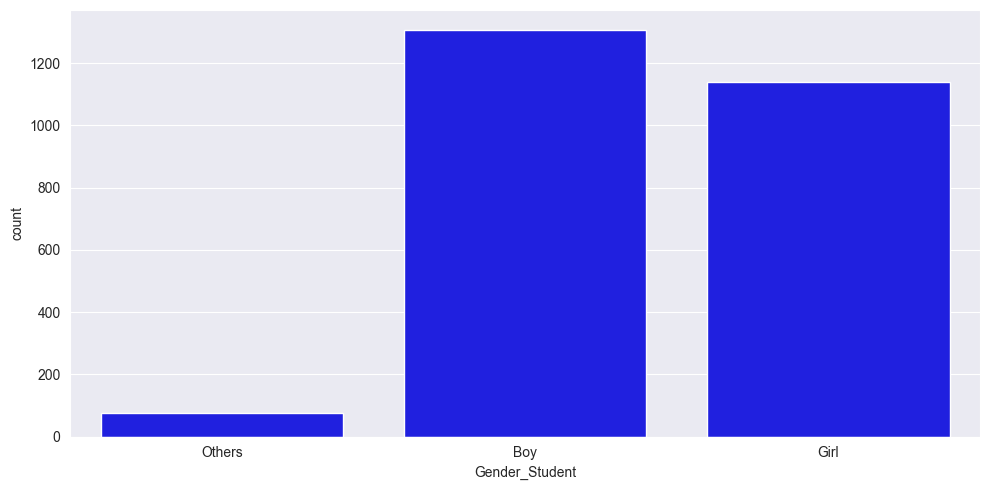

In [35]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=like_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.2.2.1.1 Percentage of boys who like learning science

In [36]:
utils.getPercentageByGender(like_science,df,"Boy")

0.6789802289281998


##### 5.2.2.1.2 Percentage of girls who like learning science

In [37]:
utils.getPercentageByGender(like_science,df,"Girl")

0.6188145731375748


#### 5.2.2.2 Gender wise distriibution of students, who do not like Science

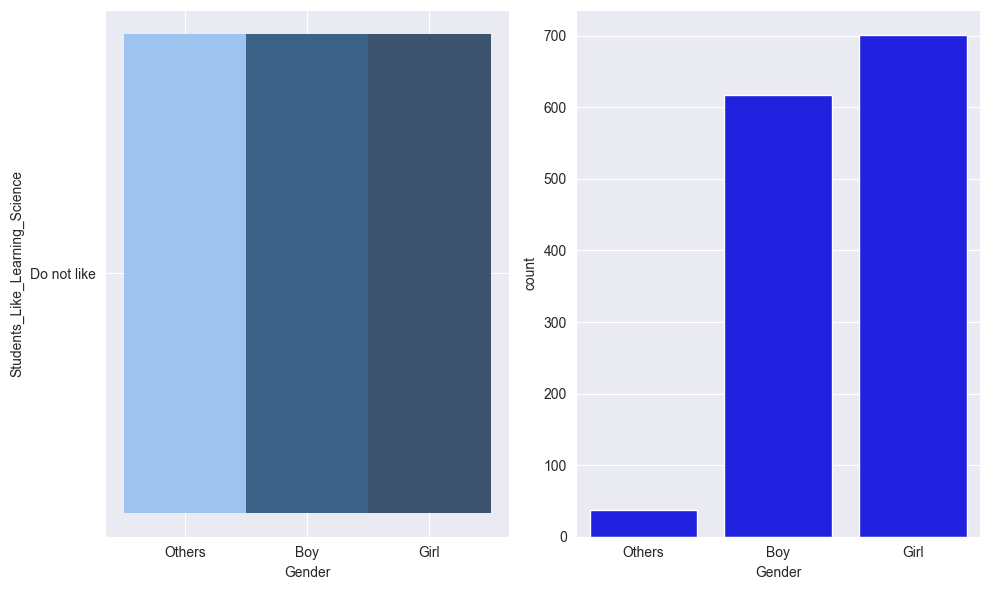

,count,unique,top,freq
Gender_Student,,,,
Others,68,1,Others,68
Boy,1035,1,Boy,1035
Girl,1116,1,Girl,1116


In [38]:
dont_like_science, math_grouped = utils.subjectLikeness(df,"Science", "Do not")
gender_groped.describe()


##### 5.2.2.2.1 Percentage of boys don't like learning science

In [39]:
utils.getPercentageByGender(dont_like_science,df,"Boy")

0.3210197710718002



##### 5.2.2.2.2 Percentage of girls don't like learning science

In [40]:
utils.getPercentageByGender(dont_like_maths,df,"Girl")

0.6068515497553018


## 5.3 Confidence and Gender

In [41]:
subject_confidence_mask = df.columns.str.contains("Confident")
df[df.columns[subject_confidence_mask]].value_counts()

Students_Confident_in_Mathematics  Students_Confident_in_Science
Not Confident                      Not Confident                    1030
                                   Some what confident               712
Some what confident                Some what confident               673
                                   Not Confident                     502
                                   Very confident                    248
Very confident                     Very confident                    221
                                   Some what confident               196
Not Confident                      Very confident                    168
Very confident                     Not Confident                     125
Name: count, dtype: int64

In [42]:
df["Students_Confident_in_Mathematics"] = df["Students_Confident_in_Mathematics"].apply(lambda x: "Not Confident" if "Not" in str(x) else x )
df["Students_Confident_in_Mathematics"] = df["Students_Confident_in_Mathematics"].apply(lambda x: "Some what confident" if "Somewhat" in str(x) else x )
df["Students_Confident_in_Mathematics"] = df["Students_Confident_in_Mathematics"].apply(lambda x: "Very confident" if "Very" in str(x) else x )
df["Students_Confident_in_Mathematics"].value_counts()



Students_Confident_in_Mathematics
Not Confident          1910
Some what confident    1423
Very confident          542
Name: count, dtype: int64

In [43]:
df["Students_Confident_in_Science"] = df["Students_Confident_in_Science"].apply(lambda x: "Not Confident" if "Not" in str(x) else x )
df["Students_Confident_in_Science"] = df["Students_Confident_in_Science"].apply(lambda x: "Some what confident" if "Somewhat" in str(x) else x )
df["Students_Confident_in_Science"] = df["Students_Confident_in_Science"].apply(lambda x: "Very confident" if "Very" in str(x) else x )
df["Students_Confident_in_Science"].value_counts()



Students_Confident_in_Science
Not Confident          1657
Some what confident    1581
Very confident          637
Name: count, dtype: int64

### 5.3.1 Gender and Confidence in Mathematics

#### 5.3.1.1 Gender wise distribution of students are confident Mathematics

In [44]:
ver_much_like = df["Students_Confident_in_Mathematics"].str.contains("Very")
some_what_like = df["Students_Confident_in_Mathematics"].str.contains("Some")
confident_in_maths  = df[ver_much_like | some_what_like]
confident_in_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,56,1,Others,56
Boy,1068,1,Boy,1068
Girl,841,1,Girl,841


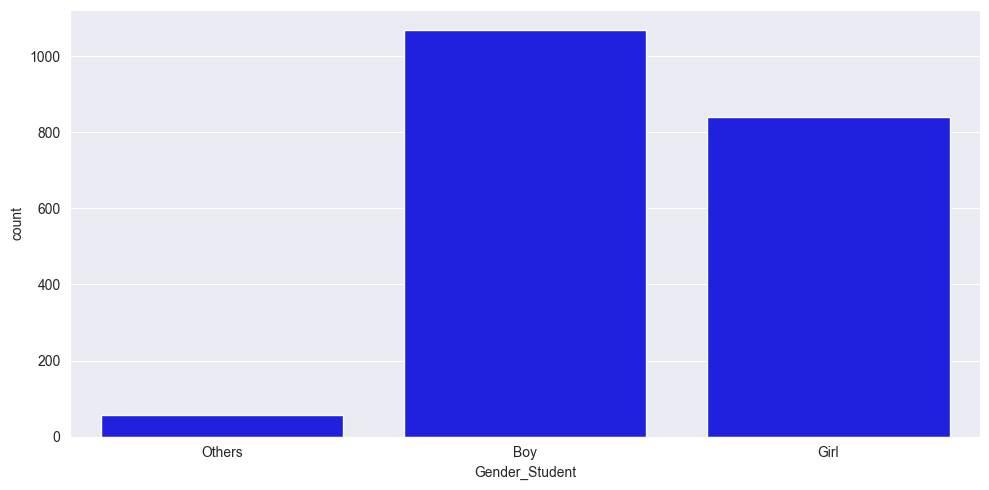

In [45]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=confident_in_maths, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()

##### 5.3.1.1.1 Percentage of boys, who are confident in mathematics

In [46]:
utils.getPercentageByGender(confident_in_maths,df,"Boy")

0.5556711758584808


##### 5.3.1.1.2 Percentage of girls, who are confident in mathematics

In [47]:
utils.getPercentageByGender(confident_in_maths,df,"Girl")

0.4573137574768896


#### 5.3.1.2 Gender wise distribution of students who are not confident in Mathematics

In [48]:
not_confident = df["Students_Confident_in_Mathematics"].str.contains("Not")
not_confident_in_maths  = df[not_confident]
not_confident_in_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,58,1,Others,58
Boy,854,1,Boy,854
Girl,998,1,Girl,998


##### 5.3.1.2.1 Percentage of boys, who are not confident mathematics

In [49]:
utils.getPercentageByGender(not_confident_in_maths,df,"Boy")

0.44432882414151925


##### 5.3.1.2.2 Percentage of girls, who are not confident in mathematics

In [50]:
utils.getPercentageByGender(not_confident_in_maths,df,"Girl")

0.5426862425231104


### 5.3.2 Gender and Confidence in Science

#### 5.3.2.1 Gender wise distriibution of students who are confident Science

In [51]:
ver_much_like = df["Students_Confident_in_Science"].str.contains("Very")
some_what_like = df["Students_Confident_in_Science"].str.contains("Some")
confident_in_science  = df[ver_much_like | some_what_like]
confident_in_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,69,1,Others,69
Boy,1187,1,Boy,1187
Girl,962,1,Girl,962


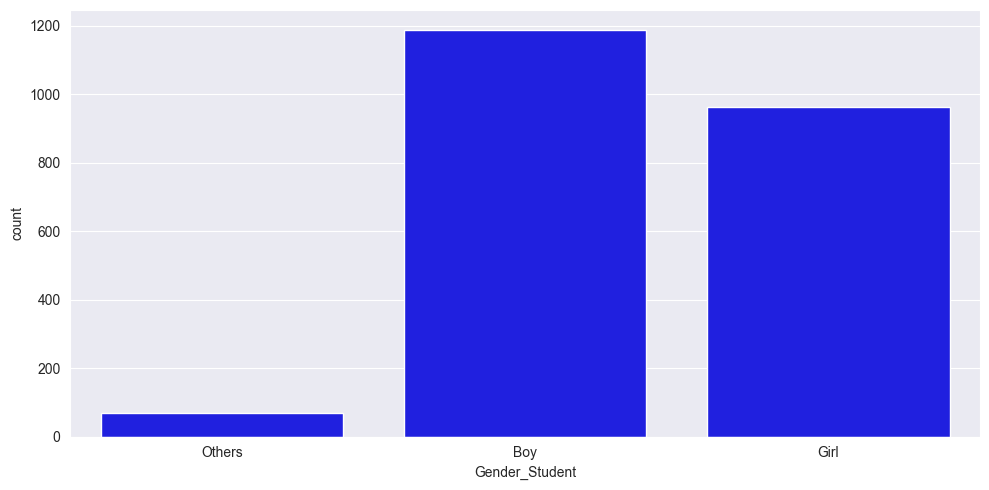

In [52]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=confident_in_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.3.2.1.1 Percentage of boys who are confident learning science

In [53]:
utils.getPercentageByGender(confident_in_science,df,"Boy")

0.617585848074922


##### 5.3.2.1.2 Percentage of girls who are confident in science

In [54]:
utils.getPercentageByGender(confident_in_science,df,"Girl")

0.523110386079391


#### 5.3.2.2 Gender wise distriibution of students, who are not confident in Science

In [55]:
not_confident = df["Students_Confident_in_Science"].str.contains("Not")
not_confident_in_science  = df[not_confident]
not_confident_in_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,45,1,Others,45
Boy,735,1,Boy,735
Girl,877,1,Girl,877


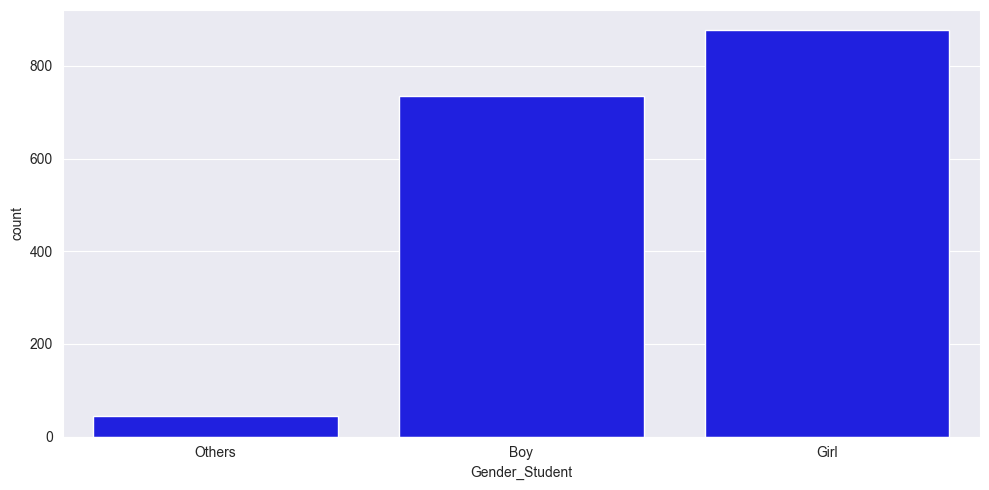

In [56]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=not_confident_in_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.3.2.2.1 Percentage of boys not confident in science

In [57]:
utils.getPercentageByGender(not_confident_in_science,df,"Boy")

0.38241415192507805



##### 5.2.2.2.2 Percentage of girls not confient in science

In [58]:
utils.getPercentageByGender(not_confident_in_science,df,"Girl")

0.476889613920609


## 5.4 Subject Clarity  and Gender

In [59]:
clarity_mask = df.columns.str.contains("Clarity")
df[df.columns[clarity_mask]].value_counts()

Instructional_Clarity_in_Mathematics_Lessons  Instructional_Clarity_in_Science_Lessons
High                                          High                                        920
Moderate                                      Moderate                                    641
                                              High                                        502
High                                          Moderate                                    480
Low                                           High                                        311
                                              Moderate                                    285
Moderate                                      Low                                         257
High                                          Low                                         252
Low                                           Low                                         227
Name: count, dtype: int64

In [60]:
df["Instructional_Clarity_in_Mathematics_Lessons"] = df["Instructional_Clarity_in_Mathematics_Lessons"].apply(lambda x: "High" if "High" in str(x) else x )
df["Instructional_Clarity_in_Mathematics_Lessons"] = df["Instructional_Clarity_in_Mathematics_Lessons"].apply(lambda x: "Moderate" if "Moderate" in str(x) else x )
df["Instructional_Clarity_in_Mathematics_Lessons"] = df["Instructional_Clarity_in_Mathematics_Lessons"].apply(lambda x: "Low" if "Low" in str(x) else x )
df["Instructional_Clarity_in_Mathematics_Lessons"].value_counts()



Instructional_Clarity_in_Mathematics_Lessons
High        1652
Moderate    1400
Low          823
Name: count, dtype: int64

In [61]:
df["Instructional_Clarity_in_Science_Lessons"] = df["Instructional_Clarity_in_Science_Lessons"].apply(lambda x: "High" if "High" in str(x) else x )
df["Instructional_Clarity_in_Science_Lessons"] = df["Instructional_Clarity_in_Science_Lessons"].apply(lambda x: "Moderate" if "Moderate" in str(x) else x )
df["Instructional_Clarity_in_Science_Lessons"] = df["Instructional_Clarity_in_Science_Lessons"].apply(lambda x: "Low" if "Low" in str(x) else x )
df["Instructional_Clarity_in_Science_Lessons"].value_counts()



Instructional_Clarity_in_Science_Lessons
High        1733
Moderate    1406
Low          736
Name: count, dtype: int64

### 5.4.1 Gender and Clarity in Mathematics

#### 5.4.1.1 Gender wise distribution of students with clarity in Mathmatics Lessons


In [62]:
high_clarity = df["Instructional_Clarity_in_Mathematics_Lessons"].str.contains("High")
moderate_clarity = df["Instructional_Clarity_in_Mathematics_Lessons"].str.contains("Moderate")
clarity_in_maths  = df[high_clarity | moderate_clarity]
clarity_in_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,82,1,Others,82
Boy,1577,1,Boy,1577
Girl,1393,1,Girl,1393


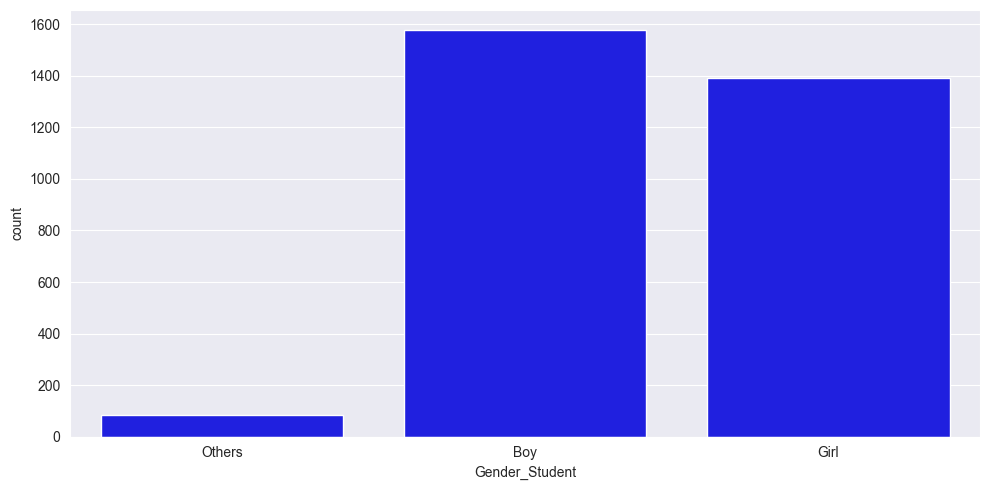

In [63]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=clarity_in_maths, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()

##### 5.4.1.1.1 Percentage of boys, who have clarity in mathematics

In [64]:
utils.getPercentageByGender(clarity_in_maths,df,"Boy")

0.8204994797086368


##### 5.3.1.1.2 Percentage of girls, who have clarity in mathematics

In [65]:
utils.getPercentageByGender(clarity_in_maths,df,"Girl")

0.7574768896139206


#### 5.4.1.2 Gender wise distribution of students who do not have clarity in Mathematics

In [66]:
no_clarity = df["Instructional_Clarity_in_Mathematics_Lessons"].str.contains("Low")
not_clear_in_maths  = df[no_clarity]
not_clear_in_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,32,1,Others,32
Boy,345,1,Boy,345
Girl,446,1,Girl,446


##### 5.4.1.2.1 Percentage of boys, who do not have clarity in  mathematics

In [67]:
utils.getPercentageByGender(not_clear_in_maths,df,"Boy")

0.17950052029136315


##### 5.4.1.2.2 Percentage of girls, whodo not have clarity in mathematics

In [68]:
utils.getPercentageByGender(not_clear_in_maths,df,"Girl")

0.2425231103860794


### 5.4.2 Gender and Likeness for Science

#### 5.4.2.1 Gender wise distriibution of students who like Science

In [69]:
ver_much_clear = df["Instructional_Clarity_in_Science_Lessons"].str.contains("High")
some_what_clear = df["Instructional_Clarity_in_Science_Lessons"].str.contains("Moderate")
clear_in_science  = df[ver_much_clear | some_what_clear]
clear_in_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,87,1,Others,87
Boy,1610,1,Boy,1610
Girl,1442,1,Girl,1442


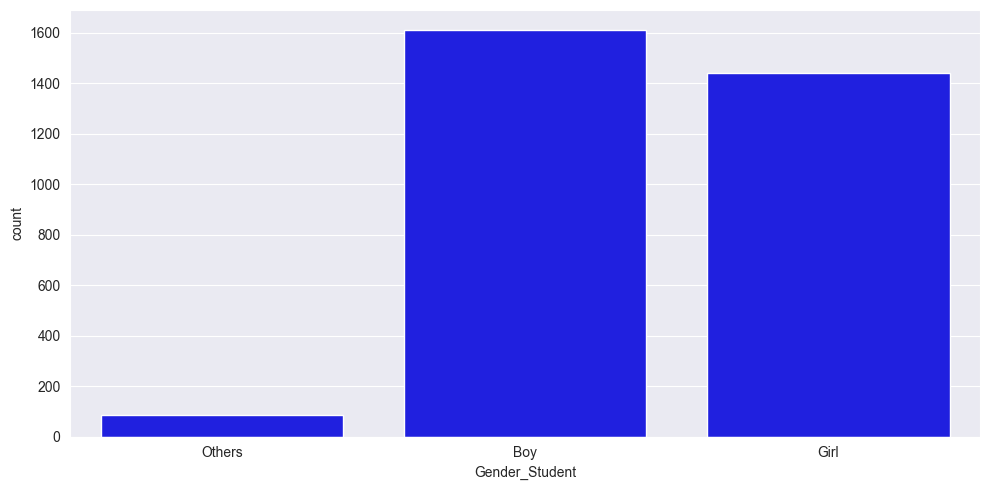

In [70]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=clear_in_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.4.2.1.1 Percentage of boys who like learning science

In [71]:
utils.getPercentageByGender(clear_in_science,df,"Boy")

0.8376690946930281


##### 5.4.2.1.2 Percentage of girls who like learning science

In [72]:
utils.getPercentageByGender(clear_in_science,df,"Girl")

0.7841218053289831


#### 5.4.2.2 Gender wise distriibution of students, who does not like learning Science

In [73]:
not_clear_in_science_mask = df["Students_Confident_in_Science"].str.contains("Not")
not_clear_in_science  = df[not_clear_in_science_mask]
not_clear_in_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,45,1,Others,45
Boy,735,1,Boy,735
Girl,877,1,Girl,877


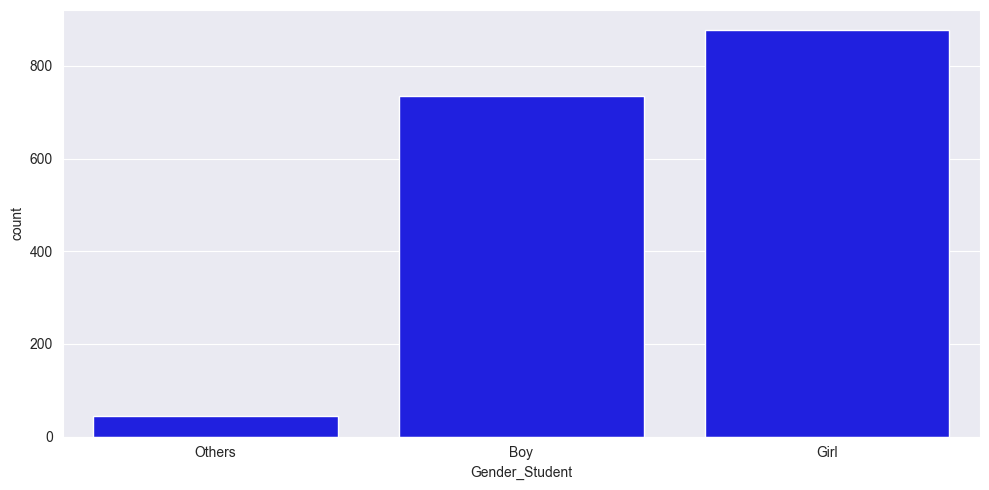

In [74]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=not_clear_in_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.4.2.2.1 Percentage of boys dont like learning science

In [75]:
utils.getPercentageByGender(not_clear_in_science,df,"Boy")

0.38241415192507805



##### 5.3.2.2.2 Percentage of girls don't like learning science

In [76]:
utils.getPercentageByGender(not_clear_in_science,df,"Girl")

0.476889613920609


## 5.5 Value for Subject, and Environmental Preservation and Gender

In [77]:
value_mask = df.columns.str.contains("Value")
print(df[df.columns[value_mask]].value_counts())

Students_Value_Mathematics  Students_Value_Science  Students_Value_Environmental_Preservation
Somewhat value              Somewhat value          Strongly value                               808
Do Not Value Mathematics    Do Not Value Science    Strongly value                               574
Somewhat value              Do Not Value Science    Strongly value                               493
Strongly value              Strongly value          Strongly value                               458
                            Somewhat value          Strongly value                               327
Somewhat value              Strongly value          Strongly value                               316
Do Not Value Mathematics    Somewhat value          Strongly value                               234
Strongly value              Do Not Value Science    Strongly value                               169
Do Not Value Mathematics    Do Not Value Science    Somewhat value                               1

In [78]:
df["Students_Value_Science"] = df["Students_Value_Science"].apply(lambda x: "Strongly value" if "Strongly" in str(x) else x )
df["Students_Value_Science"] = df["Students_Value_Science"].apply(lambda x: "Do not value" if "Do not" in str(x) else x )
df["Students_Value_Science"] = df["Students_Value_Science"].apply(lambda x: "Somewhat value" if "Somewhat" in str(x) else x )
print(df["Students_Value_Science"].value_counts())



Students_Value_Science
Do Not Value Science    1493
Somewhat value          1490
Strongly value           892
Name: count, dtype: int64


In [79]:
df["Students_Value_Mathematics"] = df["Students_Value_Mathematics"].apply(lambda x: "Strongly value" if "Strongly" in str(x) else x )
df["Students_Value_Mathematics"] = df["Students_Value_Mathematics"].apply(lambda x: "Do not value" if "Do not" in str(x) else x )
df["Students_Value_Mathematics"] = df["Students_Value_Mathematics"].apply(lambda x: "Somewhat value" if "Somewhat" in str(x) else x )
print(df["Students_Value_Mathematics"].value_counts())



Students_Value_Mathematics
Somewhat value              1792
Do Not Value Mathematics    1063
Strongly value              1020
Name: count, dtype: int64


In [80]:
df["Students_Value_Environmental_Preservation"] = df["Students_Value_Environmental_Preservation"].apply(lambda x: "Strongly value" if "Strongly" in str(x) else x )
df["Students_Value_Environmental_Preservation"] = df["Students_Value_Environmental_Preservation"].apply(lambda x: "Do not value" if "Do not" in str(x) else x )
df["Students_Value_Environmental_Preservation"] = df["Students_Value_Environmental_Preservation"].apply(lambda x: "Somewhat value" if "Somewhat" in str(x) else x )
print(df["Students_Value_Environmental_Preservation"].value_counts())



Students_Value_Environmental_Preservation
Strongly value    3438
Somewhat value     437
Name: count, dtype: int64


### 5.5.1 Gender and Value for Mathematics

#### 5.5.1.1 Gender wise distribution of students, who value Mathematics

In [81]:
strong_value = df["Students_Value_Mathematics"].str.contains("Strongly")
some_what_value = df["Students_Value_Mathematics"].str.contains("Somewhat")
value_for_maths  = df[strong_value | some_what_value]
value_for_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,77,1,Others,77
Boy,1412,1,Boy,1412
Girl,1323,1,Girl,1323


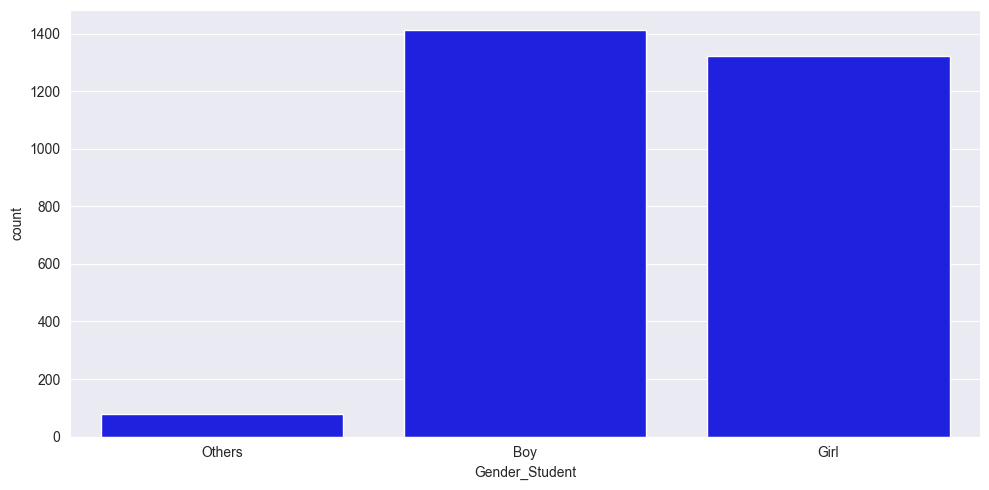

In [82]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=value_for_maths, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()

##### 5.5.1.1.1 Percentage of boys, who value mathematics

In [83]:
utils.getPercentageByGender(value_for_maths,df,"Boy")

0.7346514047866806


##### 5.5.1.1.2 Percentage of girls, who value mathematics

In [84]:
utils.getPercentageByGender(value_for_maths,df,"Girl")

0.7194127243066885


#### 5.5.1.2 Gender wise distribution of students who do not value Mathematics

In [85]:
no_value_maths = df["Students_Value_Mathematics"].str.contains("Do Not")
do_not_value_maths  = df[no_value_maths]
do_not_value_maths.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,37,1,Others,37
Boy,510,1,Boy,510
Girl,516,1,Girl,516


##### 5.5.1.2.1 Percentage of boys, who do not value mathematics

In [86]:
utils.getPercentageByGender(do_not_value_maths,df,"Boy")

0.26534859521331944


##### 5.5.1.2.2 Percentage of girls, who who do not value mathematics

In [87]:
utils.getPercentageByGender(do_not_value_maths,df,"Girl")

0.2805872756933116


### 5.5.2 Gender and Value for Science

#### 5.5.2.1 Gender wise distriibution of students who value Science

In [88]:
strong_value = df["Students_Value_Science"].str.contains("Strongly")
moderate_value = df["Students_Value_Science"].str.contains("Moderate")
value_for_science  = df[strong_value | moderate_value]
value_for_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,31,1,Others,31
Boy,395,1,Boy,395
Girl,466,1,Girl,466


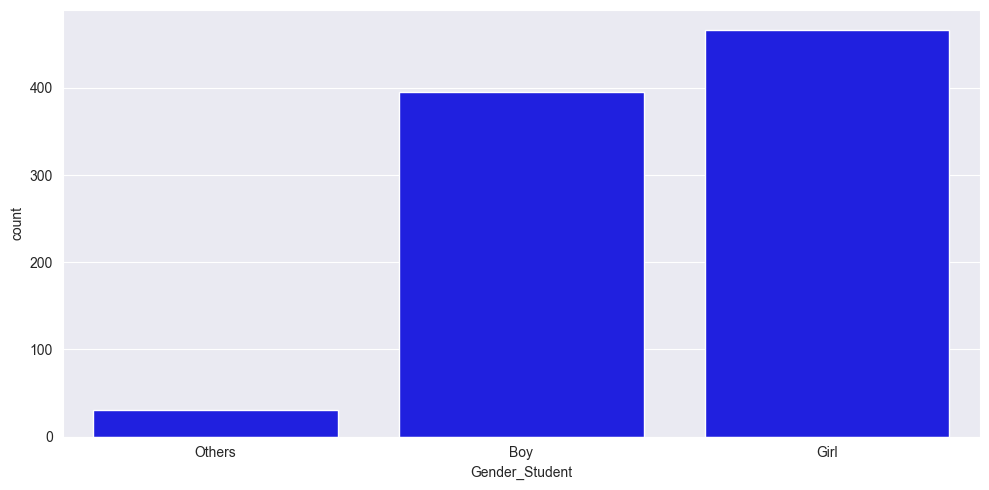

In [89]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=value_for_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.5.2.1.1 Percentage of boys who value science

In [90]:
utils.getPercentageByGender(value_for_science,df,"Boy")

0.20551508844953173


##### 5.5.2.1.2 Percentage of girls who value  science

In [91]:

utils.getPercentageByGender(value_for_science,df,"Girl")

0.25339858618814576


#### 5.5.2.2 Gender wise distriibution of students, who do not value Science

In [92]:
dont_value_science_mask = df["Students_Value_Science"].str.contains("Do Not")
dont_value_science  = df[dont_value_science_mask]
dont_value_science.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,40,1,Others,40
Boy,781,1,Boy,781
Girl,672,1,Girl,672


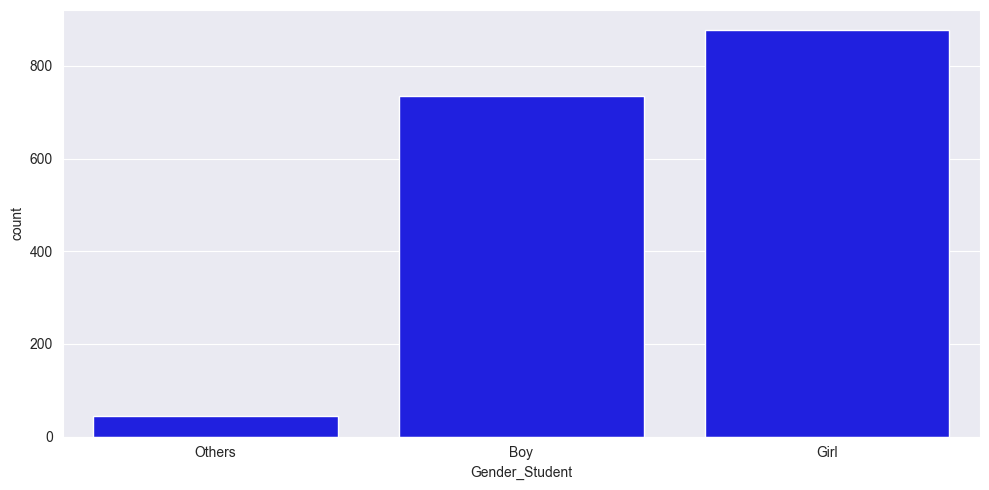

In [93]:

fig = plt.figure(figsize=(10,5))
sns.countplot(data=not_clear_in_science, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.4.2.2.1 Percentage of boys not confident in science

In [94]:
utils.getPercentageByGender(dont_value_science,df,"Boy")

0.40634755463059313



##### 5.3.2.2.2 Percentage of girls don't like learning science

In [95]:
utils.getPercentageByGender(dont_value_science,df,"Girl")

0.36541598694942906


### 5.5.3 Gender and Value for Environmental Preservation

#### 5.5.2.1 Gender wise distriibution of students who value Environmental Preservation

In [96]:
strong_value = df["Students_Value_Environmental_Preservation"].str.contains("Strongly")
moderate_value = df["Students_Value_Environmental_Preservation"].str.contains("Moderate")
value_for_ep  = df[strong_value | moderate_value]
value_for_ep.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,91,1,Others,91
Boy,1623,1,Boy,1623
Girl,1724,1,Girl,1724


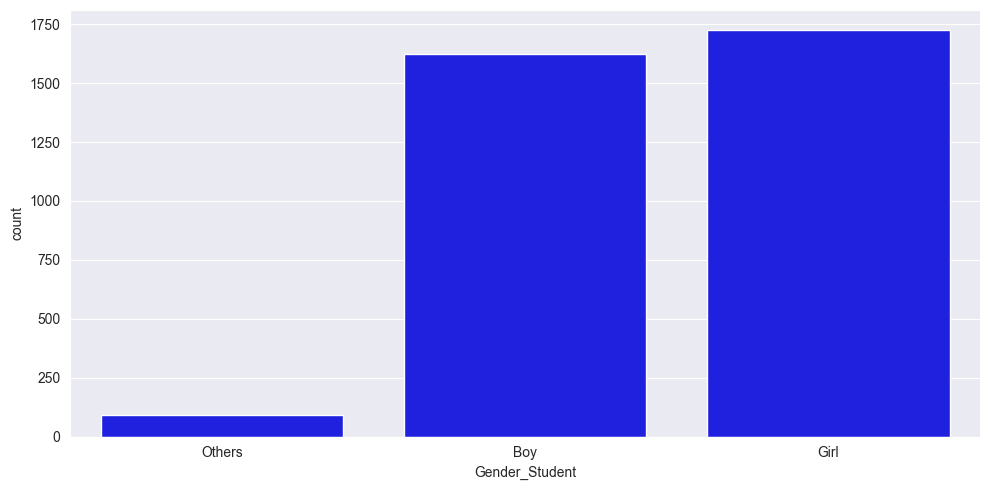

In [97]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=value_for_ep, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.5.3.1.1 Percentage of boys who value Environment Preservation

In [98]:
utils.getPercentageByGender(value_for_ep,df,"Boy")

0.8444328824141519


##### 5.5.2.1.2 Percentage of girls who value Environmental Preservation

In [99]:
utils.getPercentageByGender(value_for_ep,df,"Girl")

0.9374660141381186


#### 5.5.3.2 Gender wise distriibution of students, who do not value SEnvironemntal Preservation

In [100]:
dont_value_ep_stu = df["Students_Value_Science"].str.contains("Do Not")
dont_value_ep  = df[dont_value_ep_stu]
dont_value_ep.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,40,1,Others,40
Boy,781,1,Boy,781
Girl,672,1,Girl,672


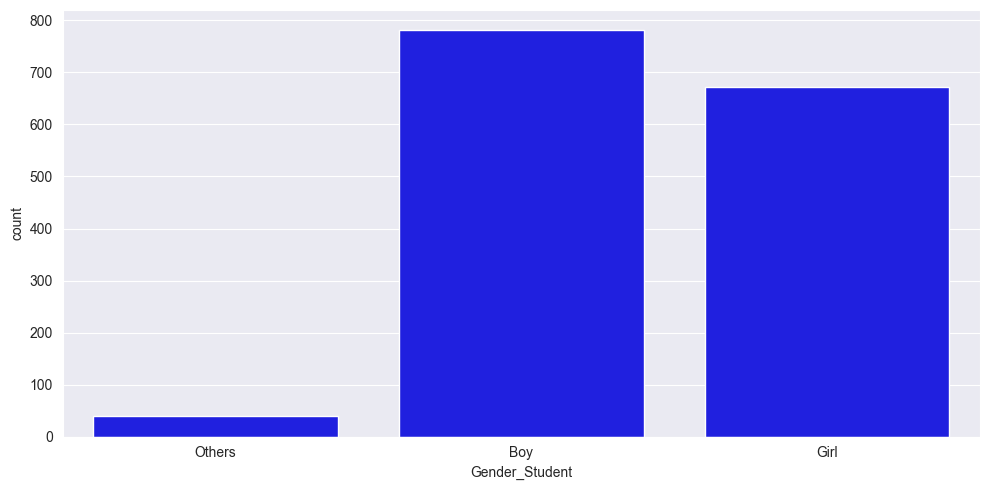

In [101]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=dont_value_ep, x="Gender_Student", color="b")
plt.tight_layout()
plt.show()


##### 5.4.2.2.1 Percentage of boys, who dont value Environmental Preservation

In [102]:
utils.getPercentageByGender(dont_value_ep,df,"Boy")

0.40634755463059313



##### 5.3.2.2.2 Percentage of girls don't like learning science

In [103]:
utils.getPercentageByGender(dont_value_ep,df,"Girl")

0.36541598694942906


In [104]:
df.info()

df.to_feather("./data/cleaned_behavior.feather")

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 5089
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Gender_Student                                3875 non-null   category
 1   Lang_Spoken_Home                              3875 non-null   category
 2   Books_Home                                    3875 non-null   category
 3   Own_Computer                                  3875 non-null   category
 4   Shared_Computer                               3875 non-null   category
 5   Smartphone                                    3875 non-null   category
 6   Internet_Access                               3875 non-null   category
 7   Study_Desk                                    3875 non-null   category
 8   Own_Room                                      3875 non-null   category
 9   ParentA_Edu_Level                             3875 non-nu